# Generative simulations: spatiotemporal process models

*Space-Time Analytics — Lab for spatiotemporal process models*

2016-11-14

Your name: Travis Williams

Date: 11/27/2016

## Description

For this week's lab, you will be simulating from a variety of models of increasing complexity to better understand how spatiotemporal process models work. 

For each model below, simulate one realization of the parameters and the data (conditional on the parameters). Then, visualize the data in a way that makes sense given the spatial and temporal structure of the data. 

## Model 1: Model of the mean

*Specification*

We have observations $y_1, y_2, y_{N_t}$, each of which is independent and identically distributed as:

$$y_t \sim \text{Normal}(\mu = 0, \sigma_y)$$

$$\sigma_y \sim \text{Normal}_+(0, 1)$$

(array([ 0.00186864,  0.00093432,  0.00093432,  0.00186864,  0.00186864,
         0.00373728,  0.00560591,  0.00373728,  0.00280296,  0.00467159,
         0.00747455,  0.01308046,  0.01588342,  0.01681774,  0.01775206,
         0.02709524,  0.02148933,  0.02522661,  0.0448473 ,  0.04858458,
         0.0448473 ,  0.06913959,  0.06073072,  0.06446799,  0.06166504,
         0.09623483,  0.10651234,  0.11398689,  0.11024961,  0.14388509,
         0.15509691,  0.16630874,  0.17565193,  0.19900989,  0.18032352,
         0.21022172,  0.23638264,  0.22703946,  0.21769627,  0.23171105,
         0.22610514,  0.27375539,  0.24198856,  0.2690838 ,  0.25787198,
         0.27188676,  0.27562403,  0.25974061,  0.24011992,  0.27001812,
         0.25974061,  0.24292288,  0.25600334,  0.23731696,  0.21582763,
         0.19340398,  0.20274717,  0.18032352,  0.18499511,  0.20087853,
         0.14201645,  0.16070283,  0.11865848,  0.11492121,  0.10277506,
         0.09249756,  0.11305257,  0.0896946 ,  0.0

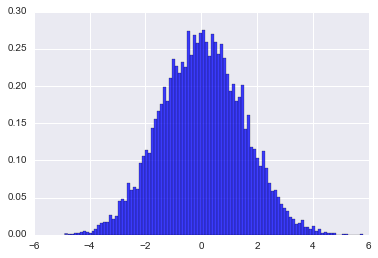

In [3]:
import numpy as np
import pylab as py
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline

sigma_y = abs(np.random.normal(loc=0.0, scale=1.0, size=1))
y_t = np.random.normal(loc=0.0, scale=sigma_y, size=10000)
plt.hist(y_t,100, normed=1, facecolor='blue', alpha=0.75)

In [5]:
sample = y_t[0:9]
sample

array([ 0.87970228, -0.1587413 , -0.94168775, -1.65470415, -0.57623189,
        0.19588545,  1.68904822, -0.03008433,  1.52539296])

## Model 2: Varying-intercept model

*Specification*

At $N_s = 100$ spatial locations we observe the response $y(s, t)$ at each of $N_t = 10$ time steps:

**Likelihood**

$$y(s, t) \sim \text{Normal}(\beta_t, \sigma_y)$$

**Priors**

$$\beta_t \sim \text{Normal}(0, \sigma_\beta)$$

$$\sigma_\beta \sim \text{Normal}_+(0, 1)$$

$$\sigma_y \sim \text{Normal}_+(0, 1)$$

C:\Users\Travis\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


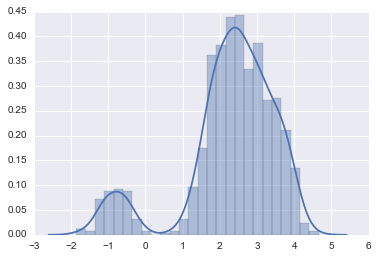

In [4]:
sigma_n = abs(np.random.normal(loc=0.0, scale=1.0, size=1))
sigma_y = abs(np.random.normal(loc=0.0, scale=1.0, size=1))
Beta_0 = np.random.normal(loc=0.0, scale=1.0, size=1)
y_st = np.random.normal(loc=Beta_0, scale = sigma_y, size=100)
#sns.distplot(y_st)

#x = np.empty((0,100))

for t in range(1,11):
    eta_t = np.random.normal(loc=0.0, scale=sigma_n, size=1)
    if t == 1:
        Beta_t = Beta_0 + eta_t
    if t > 1:
        Beta_t = Beta_t + eta_t
        y_st = np.append(y_st,np.random.normal(Beta_t,sigma_y,100))
        
sns.distplot(y_st)

## Model 3: AR(1) model

*Specification*

At $N_s = 100$ spatial locations we observe the response $y(s, t)$ at each of $N_t = 10$ time steps:

**Likelihood**

$$y(s, t) \sim \text{Normal}(\beta_t, \sigma_y)$$

**Priors**

$$\beta_t = \beta_{t - 1} + \eta_t$$

$$\eta_t \sim \text{Normal}(0, \sigma_\eta)$$

$$\beta_{t = 0} \sim \text{Normal}(0, 1)$$

$$\sigma_\eta \sim \text{Normal}_+(0, 1)$$

$$\sigma_y \sim \text{Normal}_+(0, 1)$$

C:\Users\Travis\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


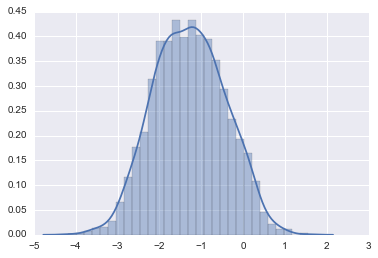

In [6]:
# your code here
sigma_n = abs(np.random.normal(loc=0.0, scale=1.0, size=1))
sigma_y = abs(np.random.normal(loc=0.0, scale=1.0, size=1))
Beta_0 = np.random.normal(loc=0.0, scale=1.0, size=1)
Eta_t = np.random.normal(loc=0, scale=sigma_n,size=1)
y_st = np.random.normal(loc=Beta_t,scale=sigma_y, size=1000)

for t in range(1,11):
    eta_t = np.random.normal(loc=0.0, scale=sigma_n, size=1)
    if t == 1:
        Beta_t = Beta_0 + eta_t
    if t > 1:
        Beta_t = Beta_t + eta_t
        y_st = np.append(y_st,np.random.normal(Beta_t,sigma_y,100))
        
sns.distplot(y_st)

## Model 4: AR(1) model + spatially-varying intercept


At $N_s = 100$ spatial locations with locations $x_1, x_2, ..., x_{N_s}$ we observe the response $y(s, t)$ at each of $N_t = 10$ time steps:

**Likelihood**

$$y(s, t) \sim \text{Normal}(\alpha_s + \beta_t, \sigma_y)$$

**Priors**

$$\alpha_s \sim \text{GP}(0, [\gamma^2 \text{exp}(-\phi d_{ij})])$$

$$\beta_t = \beta_{t - 1} + \eta_t$$

$$\eta_t \sim \text{Normal}(0, \sigma_\eta)$$

$$\beta_{t = 0} \sim \text{Normal}(0, 1)$$

$$\sigma_\eta \sim \text{Normal}_+(0, 1)$$

$$\sigma_y \sim \text{Normal}_+(0, 1)$$

$$\gamma \sim \text{Normal}_+(0, 1)$$

$$\phi \sim \text{Normal}_+(0, 1)$$


In [ ]:
import math 
N = 1000
x = sorted(np.random.rand(N))
D = np.asmatrix(x)
gamma = abs(np.random.normal(loc=0.0, scale=1, size=1))
phi = abs(np.random.normal(loc=0.0, scale=1,size=1))
sigma_n = abs(np.random.normal(loc=0.0, scale=1.0, size=1))
sigma_y = abs(np.random.normal(loc=0.0, scale=1.0, size=1))
Beta_0 = np.random.normal(loc=0.0, scale=1.0, size=1)
Eta_t = np.random.normal(loc=0, scale=sigma_n,size=1)
y_st = np.random.normal(loc=Beta_t,scale=sigma_y, size=1000)
alpha_s = (gamma**2) * math.exp(-phi * D) + sigma_sq * np.diag(N)
#sns.distplot(y_st)
# Failed to translate


I am switching to R for sanity's sake. I would like to know how to 
translate this code into python at some point, though. 

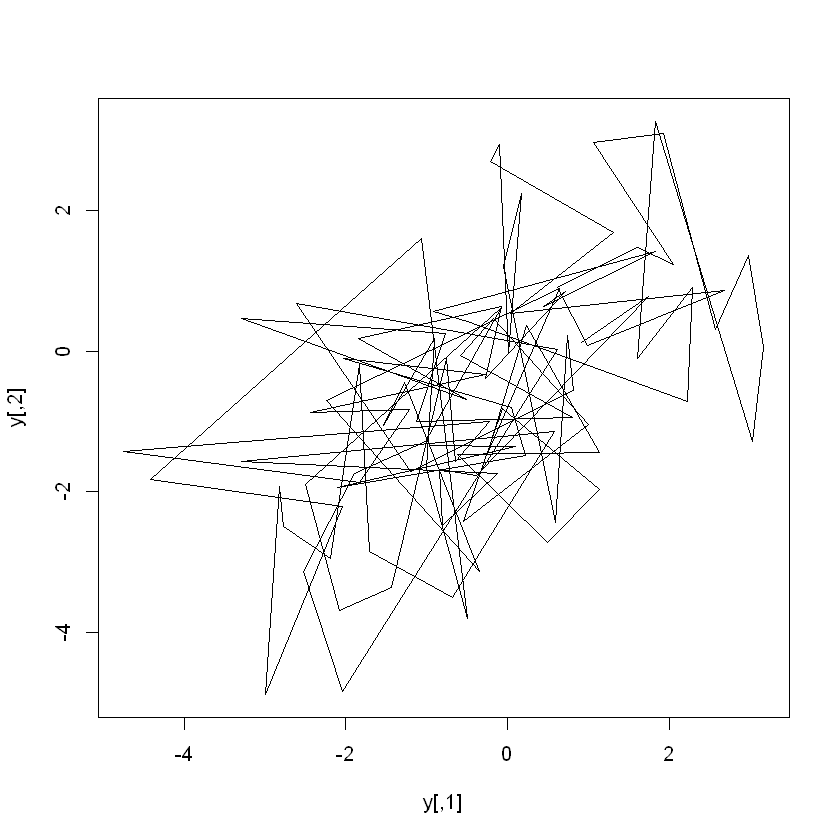

In [40]:
# Model 4 redux
library(MASS)
library(reshape2)
library(ggplot2)

N_sites = 100 
N_times = 10 
x = matrix(runif(N_sites * 2), ncol = 2)
D = as.matrix(dist(x))
y = matrix(nrow = N_sites, ncol = N_times)
beta = rep(NA, N_times)

omega = abs(rnorm(n = 1, mean = 0, sd = 1))
phi = abs(rnorm(n = 1, mean = 0, sd = 1))
gamma = abs(rnorm(n = 1, mean = 0, sd = 1))
sigma_y = abs(rnorm(n = 1, mean = 0, sd = 1))
sigma_eta = abs(rnorm(n = 1, mean = 0, sd = 1))
beta_0 = rnorm(n = 1, mean = 0, sd = 1)
eta = rnorm(n = N_times, mean = 0, sd = sigma_eta)
beta[1] = beta_0 + eta[1]

for (t in 2:N_times) {
    beta[t] = beta[t - 1] +eta[t]
}

k = gamma**2 * exp(-phi * D)
alpha = mvrnorm(n = 1, mu = rep(0,N_sites), Sigma = k)
    
for (i in 1:N_sites) {
    for (t in 1:N_times){
        y[i, t] = rnorm(1, mean = alpha[i] + beta[t], sigma_y)
    }
}
plot(y, type="l")
#hmmm

I'm leaving the above because that's hilarious. 

Please refer to the plots below for Model 4.

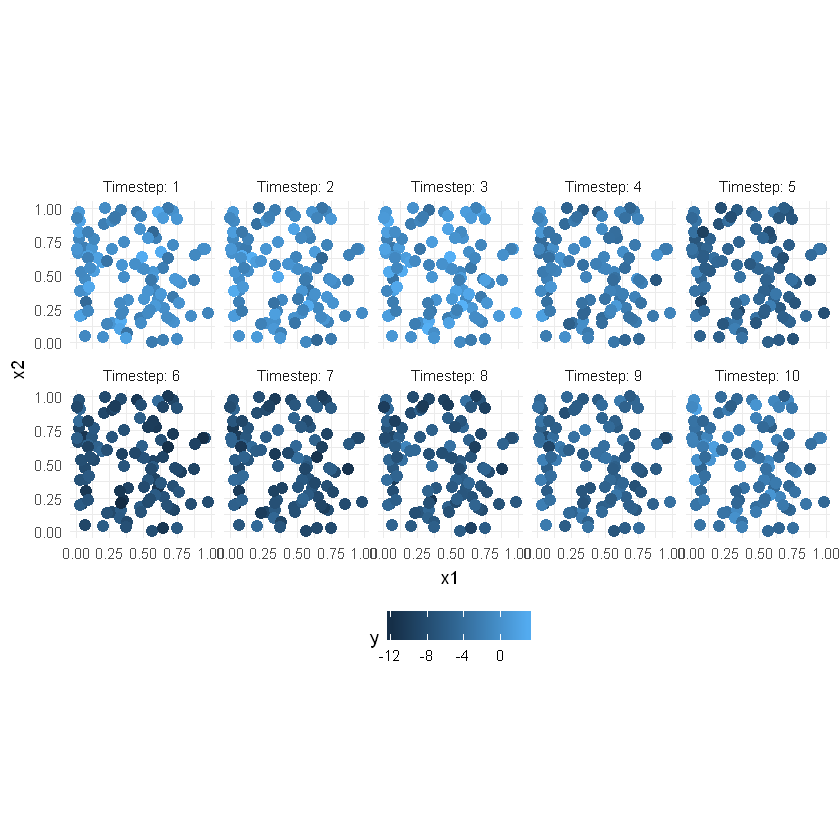

In [42]:
y_df = melt(y, varnames = c("Site", "Timestep"), value.name = "y")
y_df$x1 = x[y_df$Site, 1]
y_df$x2 = x[y_df$Site, 2]

ggplot(y_df, aes(x = x1, y =x2, color = y)) +
    geom_point(size = 3) +
    facet_wrap(~Timestep, nrow = 2, labeller = "label_both") + 
    theme_minimal() +
    coord_equal() +
    theme(legend.position = "bottom")

## Model 5: Spatiotemporal process model

At $N_s = 100$ spatial locations with locations $x_1, x_2, ..., x_{N_s}$ we observe the response $y(s, t)$ at each of $N_t = 10$ time steps:

**Likelihood**

$$y(s, t) \sim \text{Normal}(\alpha_{st}+ \beta_{t}, \sigma_y)$$

**Priors**

$$\alpha_{st} = \alpha_{s, t - 1} + \omega_{st}$$

$$\omega_{s, t} \sim \text{GP}(0, [\gamma^2 \text{exp}(-\phi d_{ij})])$$

$$\alpha_{s, t = 0} \sim \text{GP}(0, [\gamma^2 \text{exp}(-\phi d_{ij})])$$

$$\beta_t = \beta_{t - 1} + \eta_t$$

$$\eta_t \sim \text{Normal}(0, \sigma_\eta)$$

$$\beta_{t = 0} \sim \text{Normal}(0, 1)$$

$$\sigma_\eta \sim \text{Normal}_+(0, 1)$$

$$\sigma_y \sim \text{Normal}_+(0, 1)$$

$$\gamma \sim \text{Normal}_+(0, 1)$$

$$\phi \sim \text{Normal}_+(0, 1)$$

In [44]:
# your code here
alpha_0 = mvrnorm(n = 1, mu = rep(0, N_sites), Sigma = k)
omega = matrix(nrow = N_sites, ncol = N_times)
alpha = matrix(nrow = N_sites, ncol = N_times)
for (t in 1:N_times) {
    omega[, t] = mvrnorm(n = 1, mu = rep(0, N_sites), Sigma = k)
    if (t == 1) {
        alpha[, t] = alpha_0 + omega[, 1]
    } else {
        alpha[, t] = alpha[, t - 1] + omega[, t]
    }
}

for (i in 1:N_sites) {
    for (t in 1:N_times) {
        y[i, t] = rnorm(1, mean = alpha[i, t] + beta[t], sd = sigma_y)
    }
}

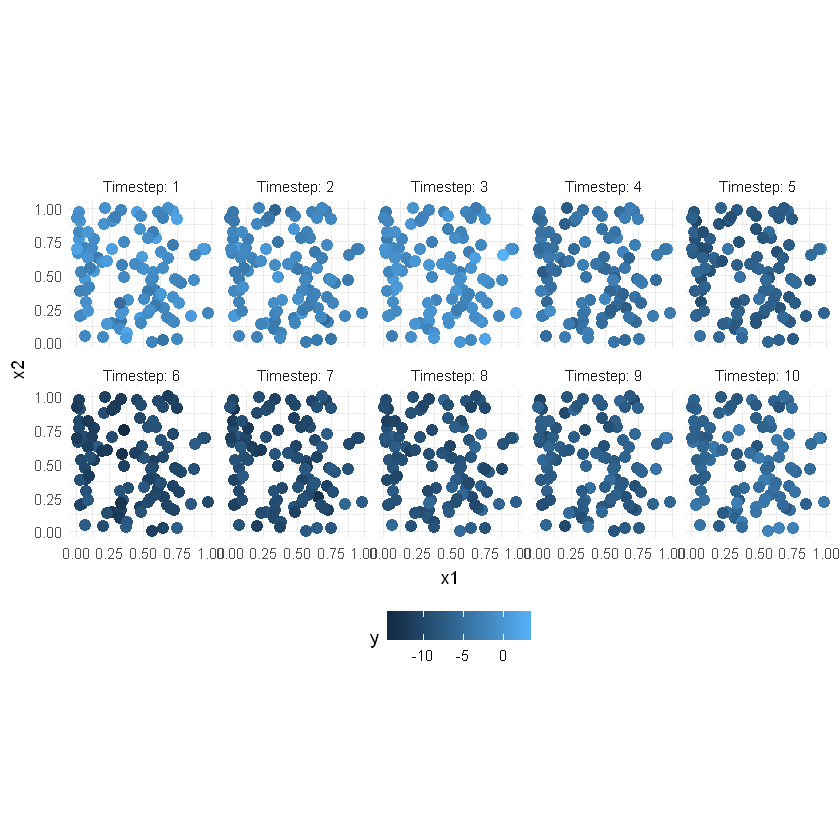

In [45]:
y_df <- melt(y, varnames = c("Site", "Timestep"), value.name = "y")
y_df$x1 <- x[y_df$Site, 1]
y_df$x2 <- x[y_df$Site, 2]

ggplot(y_df, aes(x = x1, y = x2, color = y)) + 
    geom_point(size = 3) + 
    facet_wrap(~ Timestep, nrow = 2, labeller = "label_both") +  
    theme_minimal() + 
    coord_equal() + 
    theme(legend.position = "bottom")

## Check your understanding

Explain how you would modify your spatiotemporal process model to accomplish the following (e.g., which parameters would you change, and how would you change them?): 

### Reduce spatial variation

   While not fully understanding the Gaussian Process function, I believe that we could accomplish this by minimizing the covariance function (K(x)), since it is described as a parameter and appears to serve as the standard deviation.
   It looks like we could do this by reducing phi, the decay parameter. We might also do this by reducing gamma, if that is possible, because that is described as the process variance. Sigma squared appears to serve as the nugget effect, or unexplained variance, so it reducing this should also reduce spatial variation.

### Increase the differences among years in the response $y$

   The mean of these distributions is described as time-varying, so perhaps that indicates that variance between years depends on this mean and thus the beta value of each time step. This value depends on both the previous value for beta and the value for eta of that time step. Without the eta value, though, the mean value between years would be exactly the same, so this variation depends on eta, which itself depends on sigma eta as it's standard devation. Sigma eta, then, ought to be maximized to increase differences among years.

### Increase the spatial range for the spatiotemporal effect, so that distant sites behave more similarly

   I believe that reducing spatial variation as mentioned above would accomplish this, particularly as it applied to the spatial decay parameter. So, covariance varies to a higher degree with higher values for 
   process variance, spatial decay, and unexplained variance, but as far as the range of spatial effects are concerned I would choose to reduce the phi parameter if I had one choice. However, it seems that reducing each of the exponential covariance parameters would help to reduce differences between values at farther distances.   

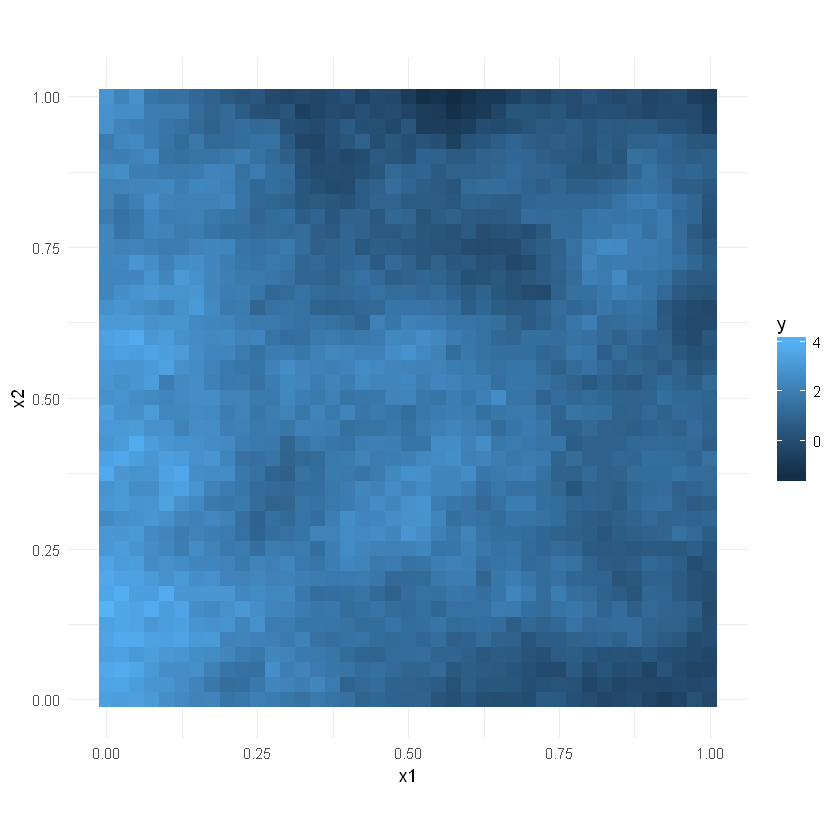

In [46]:
coords <- expand.grid(x1 = seq(0, 1, .025), 
                      x2 = seq(0, 1, .025))
N_s <- nrow(coords)
D <- as.matrix(dist(coords))

gamma_sq <- 10
phi <- .2
sigma_sq <- .01
K <- gamma_sq * exp(-phi * D) + sigma_sq * diag(N_s)
y <- mvrnorm(n = 1, mu = rep(0, N_s), Sigma = K)

coords$y <- y
ggplot(coords, aes(x = x1, y = x2, fill = y)) + 
    geom_tile() +  
    theme_minimal() + 
    coord_equal()